In [1]:
%matplotlib inline
 
import numpy as np
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=4)

import os
import xml.etree.ElementTree
from PIL import Image 
from numpy import asarray 

In [2]:
def make_square(im, min_size=256, fill_color=(0, 0, 0, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGBA', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    #new_im = new_im.convert('1')
    return new_im

In [3]:
def print_image(img):
    plt.imshow(img, cmap='Greys')
    plt.show()

In [4]:
def load_images_attributes_from_folder(folder):
    imagesAttributes = []
    for filename in os.listdir(folder):
        
        label = 0 # 0 - No people; 1 - All with mask; 2 - Person without mask
        
        e = xml.etree.ElementTree.parse(os.path.join(folder,filename)).getroot()
        
        nameTags = e.findall('.//name')
        
        if len(nameTags) == 0:
            label = 0
        else:
            label = 1
            
            for atype in e.findall('.//name'):
                if atype.text == 'without_mask':
                    label = 2
            #print(atype.text)
        
        imagesAttributes.append(label) 
        
    return imagesAttributes

In [1]:
y = load_images_attributes_from_folder('face-mask-detection\\tags')[:100]

NameError: name 'load_images_attributes_from_folder' is not defined

In [6]:
def load_images_from_folder(folder):
    images = []
    i = -1
    
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))#.convert('LA')
        i = i + 1
        
        if img is not None and i < 20:
            #
            
            img = make_square(img, 400)
            #img = img.resize((1000,1000))
            img = img.resize((400,400))
            img = img.convert('RGB')
            
            #img = rgb2gray(img)
            
            #numpydata = Image.fromarray(np.asarray(img), 'RGB')
            
            numpydata = asarray(img) 
            #numpydata = np.mean(numpydata, axis = 2)
            images.append(numpydata)
            
            print_image(numpydata)
            print(filename,' - ',y[i])
            print(img.format, img.size, img.mode)
            print(numpydata.shape)
                
    return images

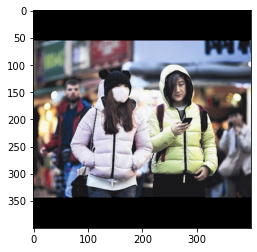

maksssksksss0.png  -  2
None (400, 400) RGB
(400, 400, 3)


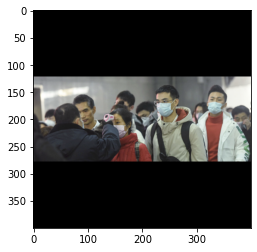

maksssksksss1.png  -  2
None (400, 400) RGB
(400, 400, 3)


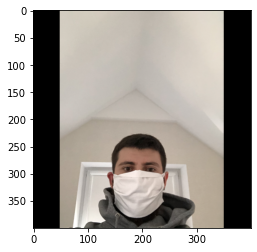

maksssksksss10.png  -  1
None (400, 400) RGB
(400, 400, 3)


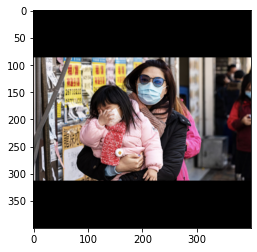

maksssksksss100.png  -  1
None (400, 400) RGB
(400, 400, 3)


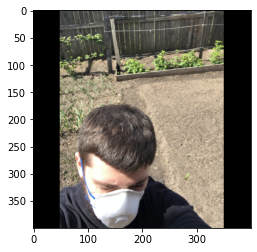

maksssksksss101.png  -  1
None (400, 400) RGB
(400, 400, 3)


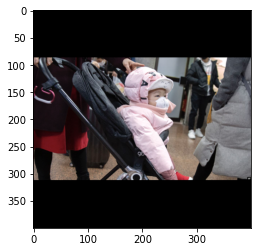

maksssksksss102.png  -  1
None (400, 400) RGB
(400, 400, 3)


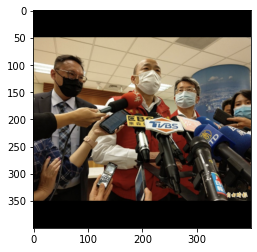

maksssksksss103.png  -  1
None (400, 400) RGB
(400, 400, 3)


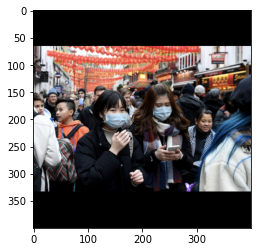

maksssksksss104.png  -  2
None (400, 400) RGB
(400, 400, 3)


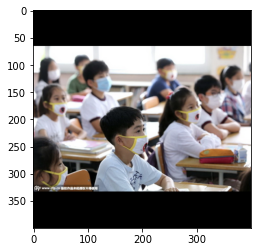

maksssksksss105.png  -  1
None (400, 400) RGB
(400, 400, 3)


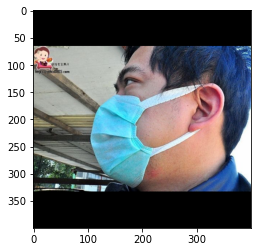

maksssksksss106.png  -  1
None (400, 400) RGB
(400, 400, 3)


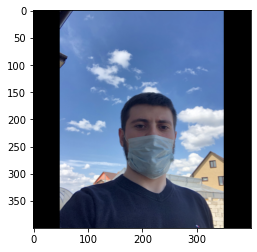

maksssksksss107.png  -  1
None (400, 400) RGB
(400, 400, 3)


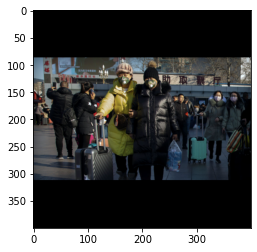

maksssksksss108.png  -  2
None (400, 400) RGB
(400, 400, 3)


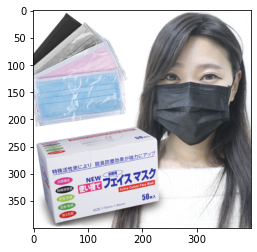

maksssksksss109.png  -  1
None (400, 400) RGB
(400, 400, 3)


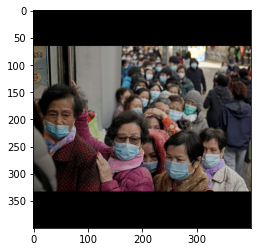

maksssksksss11.png  -  1
None (400, 400) RGB
(400, 400, 3)


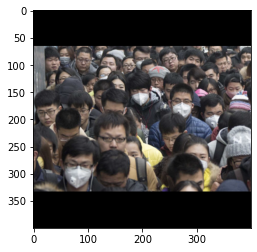

maksssksksss110.png  -  2
None (400, 400) RGB
(400, 400, 3)


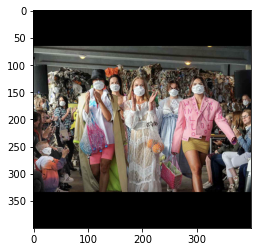

maksssksksss111.png  -  2
None (400, 400) RGB
(400, 400, 3)


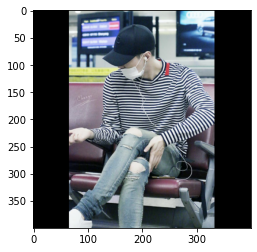

maksssksksss112.png  -  1
None (400, 400) RGB
(400, 400, 3)


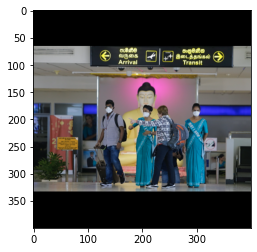

maksssksksss113.png  -  2
None (400, 400) RGB
(400, 400, 3)


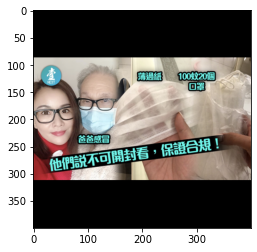

maksssksksss114.png  -  2
None (400, 400) RGB
(400, 400, 3)


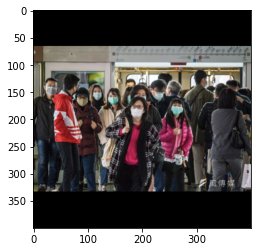

maksssksksss115.png  -  1
None (400, 400) RGB
(400, 400, 3)


In [7]:
X = load_images_from_folder('face-mask-detection\images')[:20]

In [8]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=42,
)

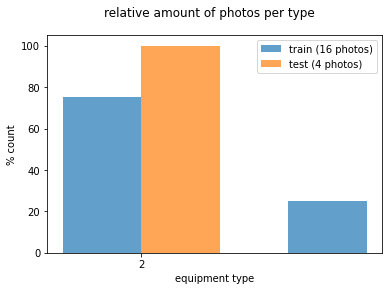

In [9]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
 
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
 
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
 
    xtemp = np.arange(len(unique))
 
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)),
    'test ({0} photos)'.format(len(y_test))
]);

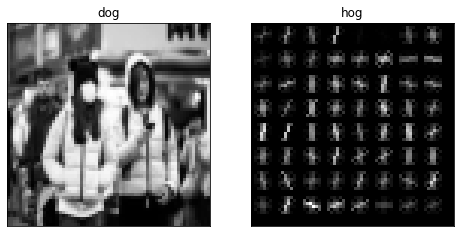

In [10]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 
testImage = imread('face-mask-detection2\images\maksssksksss0.png')
# https://en.wikipedia.org/wiki/German_Shepherd#/media/File:Kim_at_14_weeks.jpg
 
# scale down the image to one third
testImage = rescale(testImage, 1/3, mode='reflect')
# calculate the hog and return a visual representation.
testImage_hog, testImage_hog_img = hog(
    #testImage, pixels_per_cell=(12, 12),
    testImage, pixels_per_cell=(8, 8),
    #cells_per_block=(2,2),
    cells_per_block=(2,2),
    orientations=8,
    visualize=True,
    block_norm='L2-Hys')
 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    for a in ax]
 
ax[0].imshow(testImage, cmap='gray')
ax[0].set_title('dog')
ax[1].imshow(testImage_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

In [11]:
print('number of pixels: ', testImage.shape[0] * testImage.shape[1])
print('number of hog features: ', testImage_hog.shape[0])

number of pixels:  4489
number of hog features:  1568


In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
 
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
import skimage
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    #pixels_per_cell=(8, 8),
    pixels_per_cell=(6, 6),
    #cells_per_block=(1,1),
    cells_per_block=(1,1),
    orientations=9,
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
# call fit_transform on each transform converting X_train step by step
X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(16, 39204)


In [14]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [15]:
X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

In [16]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[ True  True  True  True]

Percentage correct:  100.0



 [2]


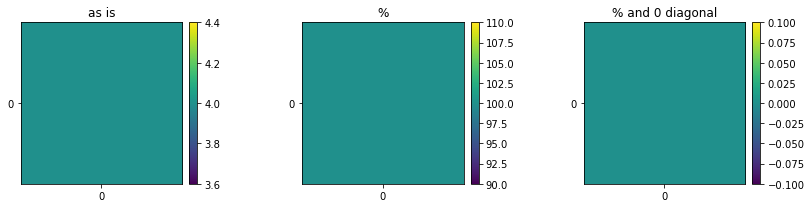

In [17]:
import pandas as pd
from sklearn.metrics import confusion_matrix
 
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
cmx = confusion_matrix(y_test, y_pred)
    
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(6)) for a in ax]
    [a.set_yticks(range(6)) for a in ax]
 
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1)
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
 
plot_confusion_matrix(cmx)
 
# the types appear in this order
print('\n', sorted(np.unique(y_test)))

In [18]:
from sklearn.pipeline import Pipeline
from sklearn import svm
 
HOG_pipeline = Pipeline([
    ('grayify', RGB2GrayTransformer()),
    ('hogify', HogTransformer(
        pixels_per_cell=(8, 8),
        cells_per_block=(2,2),
        orientations=9,
        block_norm='L2-Hys')
    ),
    ('scalify', StandardScaler()),
    ('classify', SGDClassifier(random_state=42, max_iter=1000, tol=1e-3))
])
 
clf = HOG_pipeline.fit(X_train, y_train)
print('Percentage correct: ', 100*np.sum(clf.predict(X_test) == y_test)/len(y_test))


Percentage correct:  75.0


In [19]:
from sklearn.model_selection import GridSearchCV
 
param_grid = [
    {'hogify__orientations': [9],
    'hogify__cells_per_block': [(3, 3)],
    'hogify__pixels_per_cell': [(8, 8), (14, 14)]},
    {'hogify__orientations': [9],
     'hogify__cells_per_block': [(3, 3)],
     'hogify__pixels_per_cell': [(14, 14)],
     'classify': [
         SGDClassifier(random_state=42, max_iter=1000, tol=1e-3),
         svm.SVC(kernel='linear')]}
]

In [20]:
grid_search = GridSearchCV(HOG_pipeline,
                           param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)
 
grid_res = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   25.3s finished


In [21]:
# description of the best performing object, a pipeline in our case.
grid_res.best_estimator_

Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                ('hogify', HogTransformer(pixels_per_cell=(14, 14))),
                ('scalify', StandardScaler()),
                ('classify', SGDClassifier(random_state=42))])

In [22]:
grid_res.best_score_

0.6888888888888888

In [23]:
param_grid2 = [
    {'hogify__orientations': [9],
    'hogify__cells_per_block': [(1, 1), (4, 4), (8, 8)],
    'hogify__pixels_per_cell': [(2, 2), (14, 14), (24, 24)]},
    {'hogify__orientations': [9],
     'hogify__cells_per_block': [(1, 1), (4, 4), (8, 8)],
     'hogify__pixels_per_cell': [(2, 2),(14, 14), (24, 24)],
     'classify': [
         SGDClassifier(random_state=42, max_iter=10000, tol=1e-3),
         svm.SVC(kernel='rbf', C = 1000)]}
]

In [24]:
grid_search2 = GridSearchCV(HOG_pipeline,
                           param_grid2,
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)
 
grid_res2 = grid_search2.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 20.6min finished


In [26]:
grid_res2.best_estimator_

Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                ('hogify',
                 HogTransformer(cells_per_block=(1, 1),
                                pixels_per_cell=(24, 24))),
                ('scalify', StandardScaler()), ('classify', SVC(C=1000))])

In [25]:

grid_res2.best_score_

0.8222222222222223